In [7]:
#Importing libraries

import os
import re
import cv2
import numpy as np
import matplotlib.pyplot as plt
from os.path import isfile, join




In [8]:
# Playing video from file and creating frames from the video:
cap = cv2.VideoCapture(r'C:/Users/hites/Downloads/20201230123300.mp4')

try:
    if not os.path.exists('data'):
        os.makedirs('data')
except OSError:
    print ('Error: Creating directory of data')

currentFrame = 0
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Saves image of the current frame in jpg file
    name = 'C:/Users/hites/Downloads/frames' + str(currentFrame) + '.jpg'
    print ('Creating...' + name)
    cv2.imwrite(name, frame)

    # To stop duplicate images
    currentFrame += 1

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

Creating...C:/Users/hites/Downloads/frames0.jpg
Creating...C:/Users/hites/Downloads/frames1.jpg
Creating...C:/Users/hites/Downloads/frames2.jpg
Creating...C:/Users/hites/Downloads/frames3.jpg
Creating...C:/Users/hites/Downloads/frames4.jpg
Creating...C:/Users/hites/Downloads/frames5.jpg
Creating...C:/Users/hites/Downloads/frames6.jpg
Creating...C:/Users/hites/Downloads/frames7.jpg
Creating...C:/Users/hites/Downloads/frames8.jpg
Creating...C:/Users/hites/Downloads/frames9.jpg
Creating...C:/Users/hites/Downloads/frames10.jpg
Creating...C:/Users/hites/Downloads/frames11.jpg
Creating...C:/Users/hites/Downloads/frames12.jpg
Creating...C:/Users/hites/Downloads/frames13.jpg
Creating...C:/Users/hites/Downloads/frames14.jpg
Creating...C:/Users/hites/Downloads/frames15.jpg
Creating...C:/Users/hites/Downloads/frames16.jpg
Creating...C:/Users/hites/Downloads/frames17.jpg
Creating...C:/Users/hites/Downloads/frames18.jpg
Creating...C:/Users/hites/Downloads/frames19.jpg
Creating...C:/Users/hites/Down

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgcodecs\src\loadsave.cpp:753: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'


In [9]:
# get file names of the frames
col_frames = os.listdir('frames/')

# sort file names
col_frames.sort(key=lambda f: int(re.sub('\D', '', f)))

# empty list to store the frames
col_images=[]

for i in col_frames:
    # read the frames
    img = cv2.imread('frames/'+i)
    # append the frames to the list
    col_images.append(img)

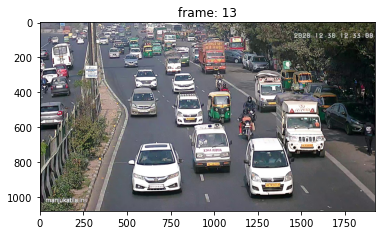

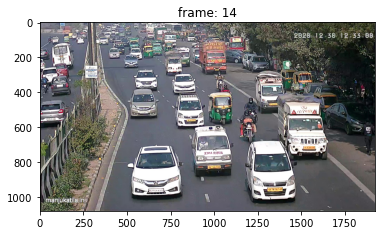

In [10]:
# plotting two consecutive frames:
i = 13

for frame in [i, i+1]:
    plt.imshow(cv2.cvtColor(col_images[frame], cv2.COLOR_BGR2RGB))
    plt.title("frame: "+str(frame))
    plt.show()

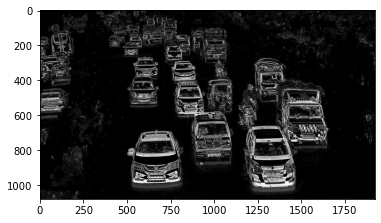

In [11]:
# convert the frames to grayscale
grayA = cv2.cvtColor(col_images[i], cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(col_images[i+1], cv2.COLOR_BGR2GRAY)

# plot the image after frame differencing
plt.imshow(cv2.absdiff(grayB, grayA), cmap = 'gray')
plt.show()

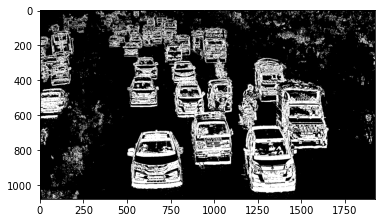

In [12]:
diff_image = cv2.absdiff(grayB, grayA)

# perform image thresholding
ret, thresh = cv2.threshold(diff_image, 30, 255, cv2.THRESH_BINARY)

# plot image after thresholding
plt.imshow(thresh, cmap = 'gray')
plt.show()

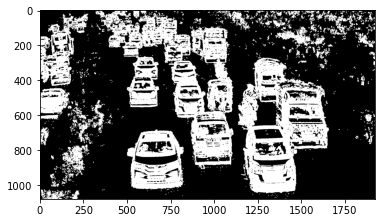

In [13]:
# apply image dilation
kernel = np.ones((3,3),np.uint8)
dilated = cv2.dilate(thresh,kernel,iterations = 1)

# plot dilated image
plt.imshow(dilated, cmap = 'gray')
plt.show()

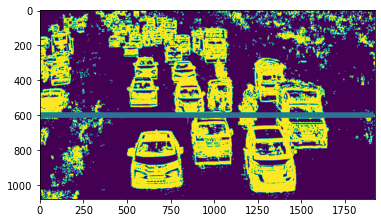

In [15]:
# plotting vehicle detection zone
plt.imshow(dilated)
cv2.line(dilated, (0, 600),(1900,600),(100, 100, 100), 20)
plt.show()

In [16]:
# finding contours in the detection zone
contours, hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

In [17]:
valid_cntrs = []

for i,cntr in enumerate(contours):
    x,y,w,h = cv2.boundingRect(cntr)
    if (250 <= x <= 1750) & (y >= 600) & (cv2.contourArea(cntr) >= 25):
        valid_cntrs.append(cntr)

# count of discovered contours        
len(valid_cntrs)

335

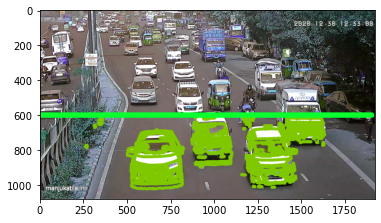

In [18]:
#finding contours in the original image:
dmy = col_images[13].copy()

cv2.drawContours(dmy, valid_cntrs, -1, (127,200,0), 15)
cv2.line(dmy, (0, 600),(1900,600),(9, 900, 45),30)
plt.imshow(dmy)
plt.show()

In [115]:
#applying the same image transformations and pre-processing operations on all the frames
# kernel for image dilation
kernel = np.ones((4,4),np.uint8)

# font style
font = cv2.FONT_HERSHEY_SIMPLEX

# directory to save the ouput frames
pathIn = "contour_frames_3/"

for i in range(len(col_images)-1):
    
    # frame differencing
    grayA = cv2.cvtColor(col_images[i], cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(col_images[i+1], cv2.COLOR_BGR2GRAY)
    diff_image = cv2.absdiff(grayB, grayA)
    
    # image thresholding
    ret, thresh = cv2.threshold(diff_image, 30, 255, cv2.THRESH_BINARY)
    
    # image dilation
    dilated = cv2.dilate(thresh,kernel,iterations = 1)
    
    # find contours
    contours, hierarchy = cv2.findContours(dilated.copy(), cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    
    # shortlist contours appearing in the detection zone
    valid_cntrs = []
    for cntr in contours:
        x,y,w,h = cv2.boundingRect(cntr)
        if (300 <= x <= 1750) & (y >= 600) & (cv2.contourArea(cntr) >= 2550):
            valid_cntrs.append(cntr)
            
    # add contours to original frames
    dmy = col_images[i].copy()
    cv2.drawContours(dmy, valid_cntrs, -1, (127,200,0), 15)
    
    cv2.putText(dmy, "vehicles detected: " + str(len(valid_cntrs)), (100, 50), font, 2, (10, 50, 79), 10)
    cv2.line(dmy, (0, 600),(1900,600),(9, 900, 45), 30)
    cv2.imwrite(pathIn+str(i)+'.jpg',dmy) 

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [118]:
# adding contours for all the moving vehicles in all the frames,stacking up the frames and creating a video:
# specifying video name
pathOut = 'vehicle_detection_v3.mp4'

# specify frames per second
fps = 14.0

In [119]:
frame_array = []
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]

In [120]:
files.sort(key=lambda f: int(re.sub('\D', '', f)))

for i in range(len(files)):
    filename=pathIn + files[i]
    
    #read frames
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    
    #inserting the frames into an image array
    frame_array.append(img)

In [121]:
out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)

for i in range(len(frame_array)):
    # writing to a image array
    out.write(frame_array[i])

out.release()